<a href="https://colab.research.google.com/github/AbelChrist/gcollab-real-esrgan/blob/main/gcollab-real-esrgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.

In [ ]:
# Clone Real-ESRGAN and enter the Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop
# Download the pre-trained model
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (390/390), done.
remote: Compressing objects: 100% (247/247), done.
remote: Total 390 (delta 208), reused 279 (delta 110), pack-reused 0
Receiving objects: 100% (390/390), 3.20 MiB | 19.28 MiB/s, done.
Resolving deltas: 100% (208/208), done.
/content/Real-ESRGAN
     |████████████████████████████████| 147 kB 5.3 MB/s 
     |████████████████████████████████| 5.8 MB 15.1 MB/s 
     |████████████████████████████████| 185 kB 32.7 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.4.2-py3-none-any.whl size=182172 sha256=5238c641c2868140fe5787b17ddb6ffb9ae7b33e0360df1a56855cbe0178d110
  Stored in directory: /root/.cache/pip/wheels/96/be/05/7e5677c7d34ee56a2a1e2f05e1ce26a0bf358c1e2fb5ee46c8
Successfully built basicsr
     |████████████████████████████████| 1.1 MB 5.4 MB/s 
     |████████████████████████████████| 177 kB 40.6 MB/s 
  Created wheel for facexlib: filename=facexlib-0.2.1.0-py3

# 2. Upload Images

Upload the images to be processed by Real-ESRGAN

In [ ]:
import os
from google.colab import files
import shutil

upload_folder = 'upload'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving eweeee.jpg to eweeee.jpg
move eweeee.jpg to upload/eweeee.jpg


# 3. Inference


In [ ]:
# if it is out of memory, try to use the `--tile` option
# We upsample the image with the scale factor X3.5
!python inference_realesrgan.py --model_path experiments/pretrained_models/RealESRGAN_x4plus.pth --input upload --netscale 4 --outscale 3.5 --half --face_enhance
# Arguments
# --model_path: the path to the pretrained model
# --input: input folder or image
# --netscale: The scale factor in the network architecture. It should be consistent with the model
# --outscale: Output scale, can be arbitrary scale factore.

python3: can't open file 'inference_realesrgan.py': [Errno 2] No such file or directory


# 4. Visualization

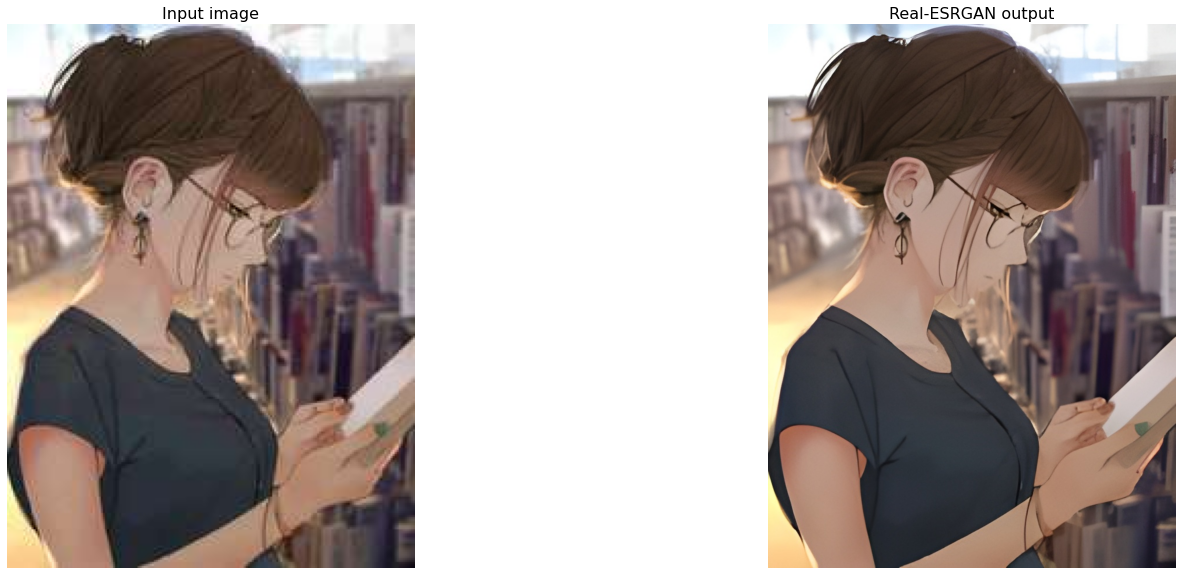

In [ ]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'upload'
result_folder = 'results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

# 5. Download Results


In [ ]:
# Download the results
zip_filename = 'Real-ESRGAN_result.zip'
if os.path.exists(zip_filename):
  os.remove(zip_filename)
os.system(f"zip -r -j {zip_filename} results/*")
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>